# SARIMAX

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sms   # type: ignore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_airline = pd.read_csv('../../data/airline_passengers.csv')
len(df_airline), df_airline.columns, df_airline.head()

(145,
 Index(['Month', 'Thousands of Passengers'], dtype='object'),
      Month  Thousands of Passengers
 0  1949-01                    112.0
 1  1949-02                    118.0
 2  1949-03                    132.0
 3  1949-04                    129.0
 4  1949-05                    121.0)

In [3]:
df_airline.dropna(axis=0, inplace=True)
df_airline.isnull().sum()

In [5]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [6]:
df_airline.set_index('Month', inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [7]:
from statsmodels.tsa.stattools import adfuller # type: ignore

In [8]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [10]:
# now we will select our p & q values

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # type: ignore

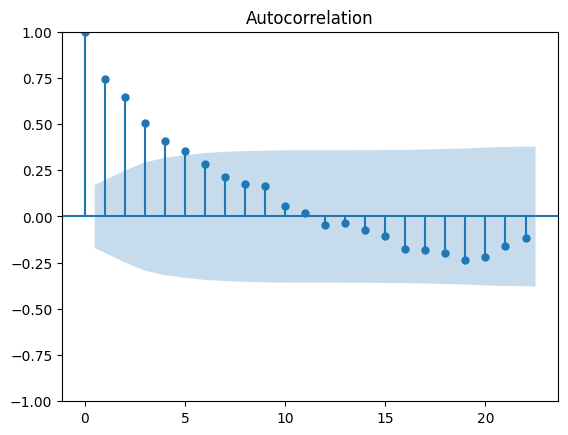

In [12]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

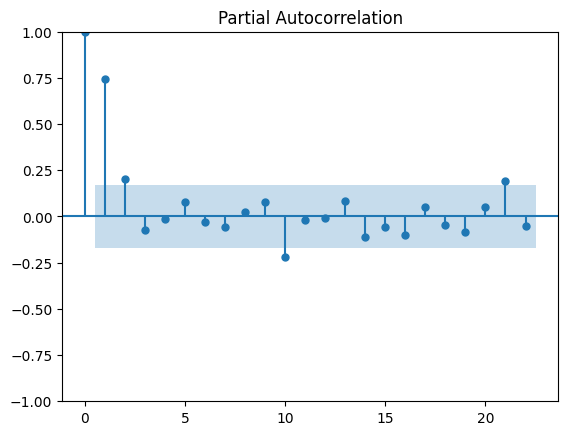

In [13]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [14]:
from datetime import datetime,timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [15]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [16]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

## Create SARIMAX model

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # type: ignore

In [20]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order = (3, 0, 5), seasonal_order = (0, 1, 0, 12))
model_SARIMAX_fit = model_SARIMAX.fit()
model_SARIMAX_fit.summary()

/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18801D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87530D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51293D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30028D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.73505D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.76101D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.64762D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.55163D-03

At iterate   45    f=  3.15778D+00    |proj g|=  6.30331D-03

At iterate   50    f=  3.15762D+00    |proj g|=  1.35401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 30 Jul 2024   AIC                            548.481
Time:                                     03:31:40   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


<Axes: xlabel='Month'>

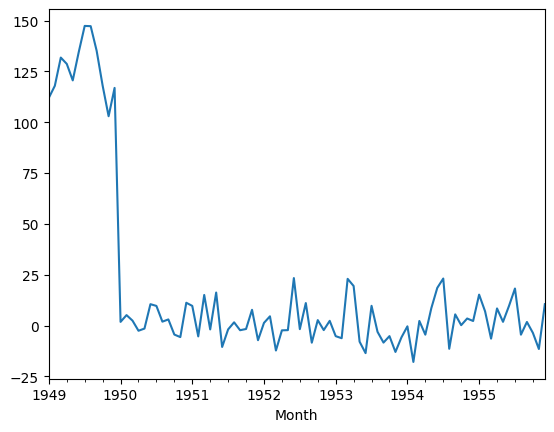

In [21]:
pred_sarimax = model_SARIMAX_fit.predict(start = datetime(1956, 6, 6), end = datetime(1960, 12, 1))
residuals = test_data['Thousands of Passengers'] - pred_sarimax
model_SARIMAX_fit.resid.plot()

<Axes: ylabel='Density'>

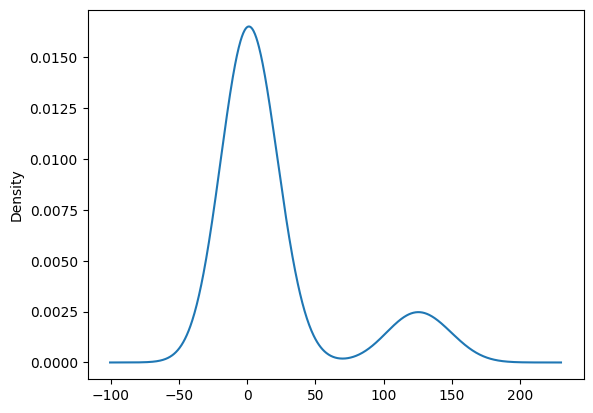

In [22]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [23]:
test_data['Predicted_SARIMAX'] = pred_sarimax

/tmp/ipykernel_835608/2646301213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_sarimax


<Axes: xlabel='Month'>

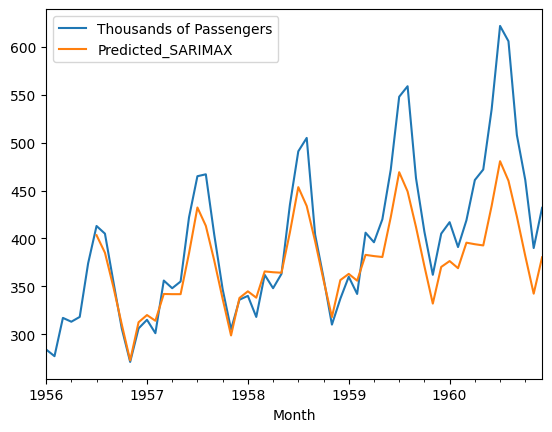

In [24]:
test_data[['Thousands of Passengers', 'Predicted_SARIMAX']].plot()